In [1]:
# D train
# average AM enters / exits

In [1]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [2]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [3]:
# look at D line only
D_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('D')]

In [4]:
# look at all station names
D_train_all['STATION'].unique()

array(['125 ST', '145 ST', '155 ST', '161/YANKEE STAD', '170 ST', '18 AV',
       '182-183 STS', '20 AV', '25 AV', '34 ST-HERALD SQ', '36 ST',
       '4 AV-9 ST', '42 ST-BRYANT PK', '47-50 STS ROCK', '4AV-9 ST',
       '5 AVE', '50 ST', '55 ST', '59 ST COLUMBUS', '7 AV', '71 ST',
       '79 ST', '9 AV', 'ATL AV-BARCLAY', "B'WAY-LAFAYETTE", 'BAY 50 ST',
       'BAY PKWY', 'BEDFORD PK BLVD', 'BLEECKER ST', 'CONEY IS-STILLW',
       'DEKALB AV', 'FORDHAM RD', 'FT HAMILTON PKY', 'GRAND ST',
       'KINGSBRIDGE RD', 'NEW UTRECHT AV', 'NORWOOD 205 ST', 'TREMONT AV',
       'W 4 ST-WASH SQ'], dtype=object)

In [5]:
# check station count
D_train_all['STATION'].count()

42

In [7]:
# needs further cleaning
D_train_all["STATION"].replace("4AV-9 ST", value="4 AV-9 ST", inplace=True)
D_train_all["STATION"].replace("BLEECKER ST", value="B'WAY-LAFAYETTE", inplace=True)
D_train_all["STATION"].replace("5 AVE", value="42 ST-BRYANT PK", inplace=True)

In [8]:
# now sum same name rows
D_commuters = D_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
D_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
125 ST,8707.0,6616.0
145 ST,13017.0,5495.0
155 ST,4413.0,872.0
161/YANKEE STAD,17163.0,3074.0
170 ST,14841.0,1884.0


In [9]:
# order stations in excel
# save as csv
D_commuters.to_csv('D_commuters.csv')

In [10]:
# open ordered CSV
csv_path_D = 'D_commuters_order.csv'
D_commuters_order = pd.read_csv(csv_path_D, encoding="utf-8")
D_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,NORWOOD 205 ST,14651,1712
1,BEDFORD PK BLVD,10584,1327
2,KINGSBRIDGE RD,13118,1982
3,FORDHAM RD,8185,915
4,182-183 STS,4110,263


In [21]:
D_commuters_order['AM_AVG_ENTER'] = D_commuters_order['AM_ENTERS']/5

In [22]:
D_commuters_order['AM_AVG_EXIT'] = D_commuters_order['AM_EXITS']/5
D_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,NORWOOD 205 ST,14651,1712,2930.2,342.4
1,BEDFORD PK BLVD,10584,1327,2116.8,265.4
2,KINGSBRIDGE RD,13118,1982,2623.6,396.4
3,FORDHAM RD,8185,915,1637.0,183.0
4,182-183 STS,4110,263,822.0,52.6


In [18]:
# order stations in excel
# save as csv
D_commuters_order.to_csv('D_commuters_final.csv')

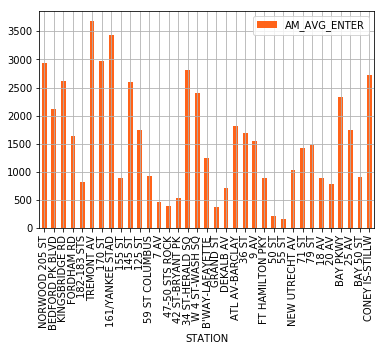

In [19]:
# graph D Train AM AVG ENTERS
plt = D_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#FF6319')
plt.grid()

# save the fig
plt.figure.savefig('D-AM-enter.pdf')

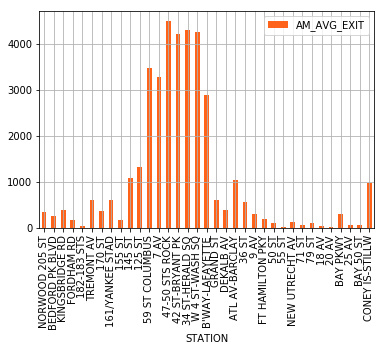

In [20]:
# graph D Train AM AVG EXITS
plt = D_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#FF6319')
plt.grid()

# save the fig
plt.figure.savefig('D-AM-exit.pdf')